# Tarea 6: Regresión logística

## Regresión logística y regularización
Considera los siguientes datos de entrenamiento donde queremos predecir la categoria $y$ en función de $x$ usando regresión logística, es decir, la probabilidad de que la $y$ sea igual a $1$ es igual a:

$$p(x) = h(a + bx)$$

Donde $a$ y $b$ son parámetros que queremos ajustar y $h$ es la función sigmoide que vimos en clase.

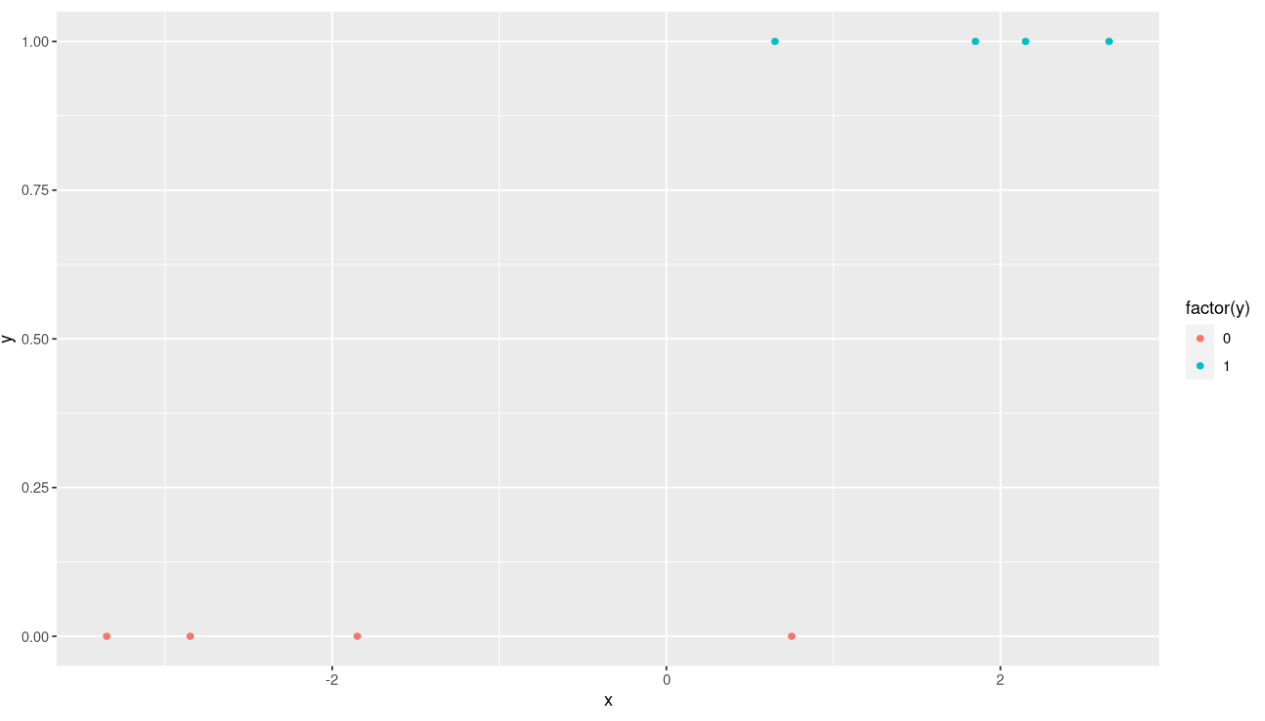

Se usarán funciones auxiliares, se pueden proponer coeficientes $a$ y $b$ de regresión logística y ver cómo ajusta el modelo.
<br>Utilizando $(a,b)=(0,-0.2)$, se obtiene el modelo:

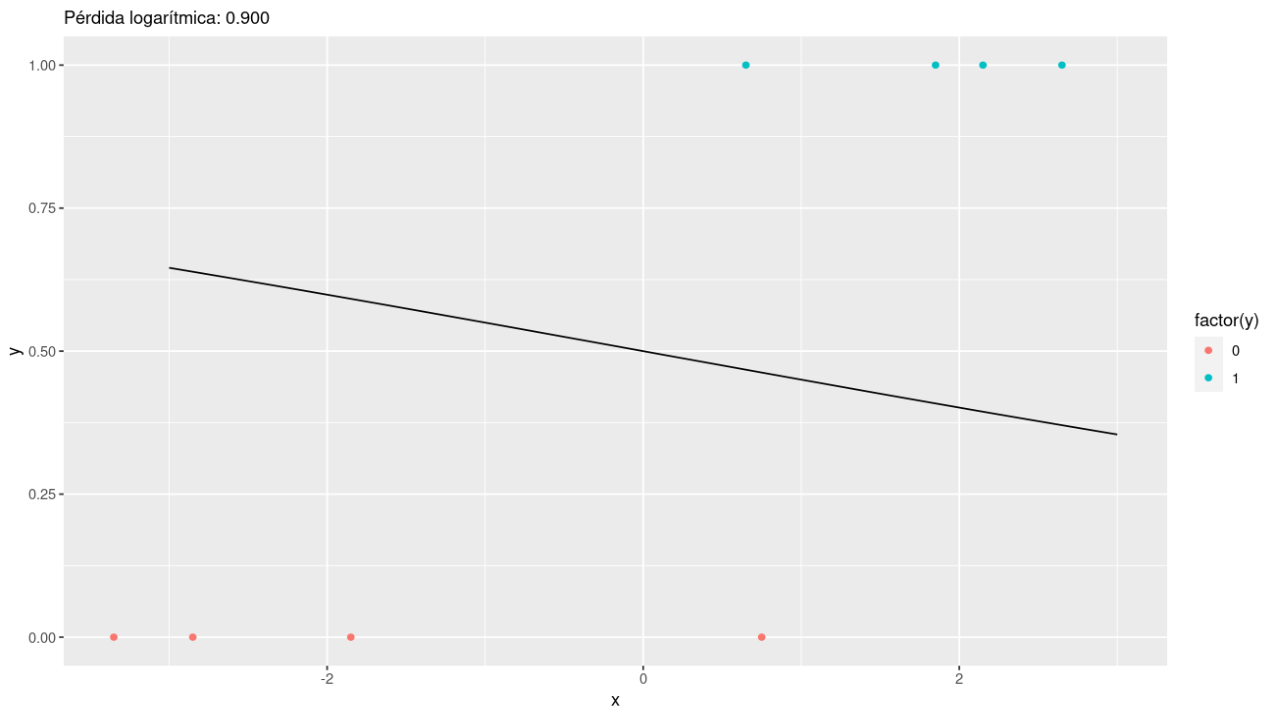

**Pregunta 1**: Cambiando los valores de $a$ y $b$ busca minimizar la pérdida logarítmica aproximadamente. ¿Tu solución da probabilidades muy cercanas a 0 y 1 para todos los valores de $x$?

Sugerencia: 
1) Cambia uno de los parámetros por una cantidad **no muy grande**. Checa si la pérdida sube o baja.
2) Si baja, entonces regresa a 1 con el otro parámetro.
3) Si no baja, mueve el parámetro en dirección contraria, hasta que la pérdida baje
4) Repite 1 alternando parámetros.

>Utilizando $(a,b)=(0,-0.2)$ se obtiene un modelo que resulta en probabilidades cercanas a los valores $0$ y $1$ en $(x<-2) \cup (x>2)$, y se ve de la siguiente forma:

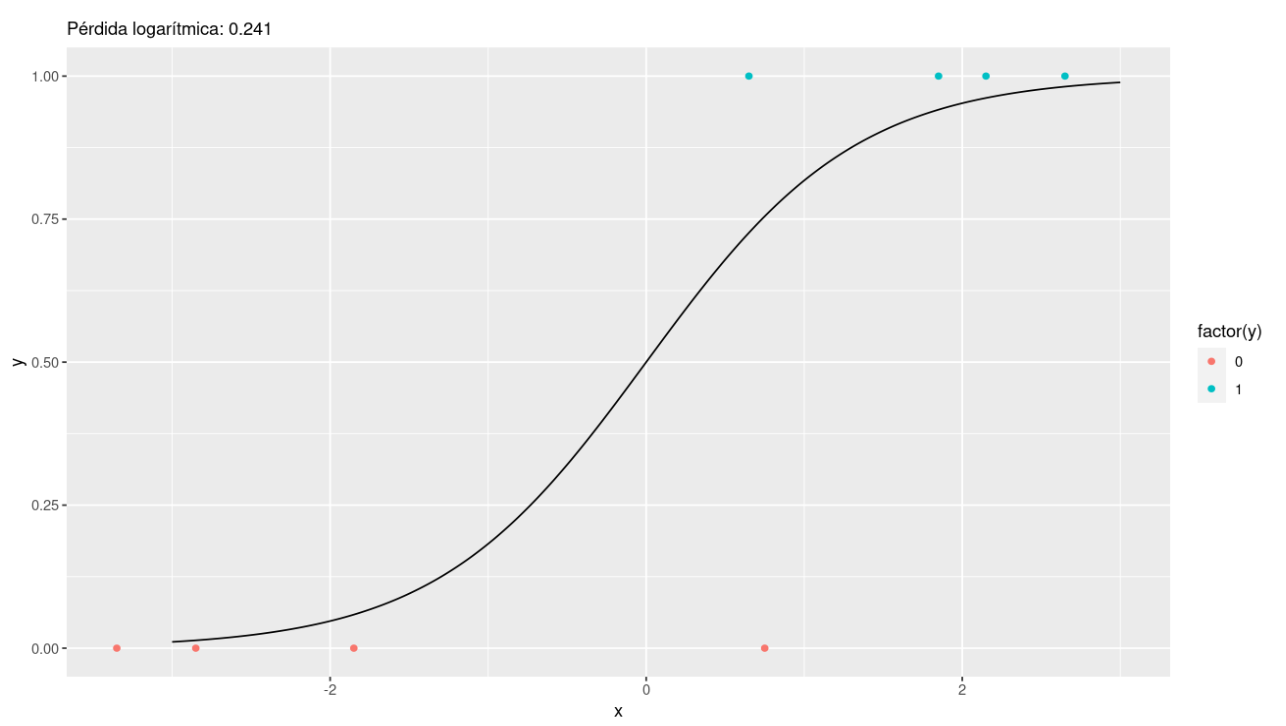

**Pregunta 2**:
<br>Usando el siguiente código o algo similar, encuentra los valores óptimos. ¿Qué optimizador se usa en este caso (consulta la documentación)? ¿Qué tan cercanos son a los valores que encontraste "manualmente" en la pregunta anterior? Si usaste otra función contesta con el optimizador que utiliza esa función.
```r
glm(y ~ x, datos_ent_tbl, family = "binomial")
```

>Se utiliza un optimizador de la familia [`binomial`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/family), y que utiliza **Newton-Raphson** como optimizador. Valores óptimos encontrados: $a=-2.043$ y $b=3.035$.
><br>Estos valores están muy alejados de los que yo encontré manualmente. 

Verifica que un optimizador genérico, para este problema, da la misma solución que la que vimos arriba, minimizando la pérdida lograrítmica.
>Valores resultantes: $a=-2.043$ y $b=3.035$.

```r
optim(par = c(0, 0), fn = perdida_log_ent)
```

## Regularización
Si queremos hacer regularización, entonces es necesario cambiar la función objetivo que queremos minimizar. Seleccionamos un valor de lambda y podemos minimizar.

**Pregunta 4**:
<br>¿Por qué en el ejemplo anterior obtienes una solución muy similar al de la pregunta anterior (mismos coeficientes)? Incrementa $\lambda$ y describe qué sucede con los coeficientes.
>Porque se está utilizando $\lambda=1x10^{-6}$, que como se vio en las notas anteriores, valores muy pequeños de penalización tienen un efecto nulo o casi nulo en el modelo.
><br>Al incrementar el valor de $\lambda$, el valor de $a$ va aumentando mientras que el valor de $b$ va disminuyendo. Para $\lambda=1x10^{-2}$, $a=-0.847$ y $b=1.670$.

**Pregunta 5**:
<br>Explica por qué una solución regularizada podría desempeñarse mejor que el modelo que ajustamos sin regularización. Por ejemplo, explica por qué con pocos datos es riesgoso que algunas regiones tengan probabilidades muy cercanas a $0$ o $1$.
>Porque se podría dar el siguiente caso:
>
>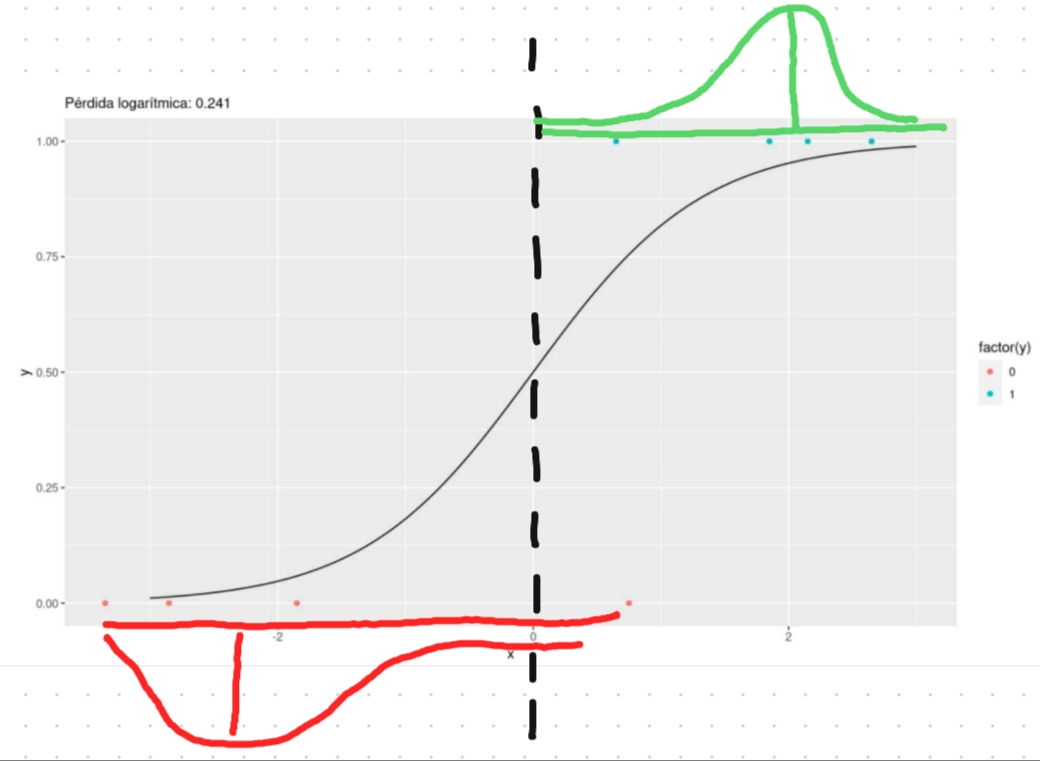
>
>En donde, la muestra utilizada para generar el modelo tenga valores que pertenezcan a las colas de las dos clases, en cuyo caso, un modelo sin regularización se sobreajustaría a estos `valores atípicos` de ambas clases. En contraste, un modelo más regularizado pordría apuntar a las regiones de mayor concentración de datos en ambas clases (cercanos a las medias)

## Regresión logística y multinomial
Consideramos un problema de regresión logística multinomial con tres clases, y una sola variable de entrada. Por ejemplo:

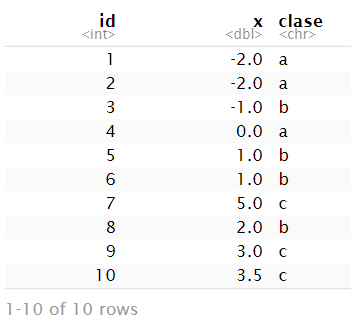

Construiremos paso por paso un modelo logístico multinomial. En este caso, escogeremos los parámetros de manera manual, pero más adelante veremos cómo ajustarlos con los datos.
<br>Ponemos para cada clase un predictor lineal:
<br>$f_a(x) = -0.5  - 0.1 x$
<br>$f_b(x) =  0.3  x$
<br>$f_c(x) = 0.6  x$

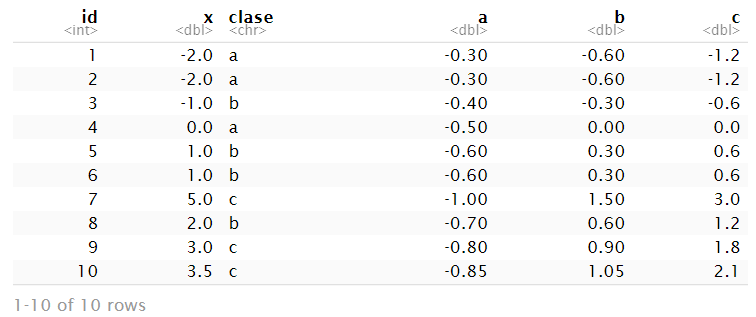



Pero en $a$, $b$ y $c$ no tenemos probabilidades (por ejemplo hay valores negativos). Según el modelo multinomial, tenemos que obtener el `softmax` de estas cantidades. Primero tomamos exponencial:

```r
probas <- probas |>
  mutate(across(c("a", "b", "c"), ~ exp(.x)))
```

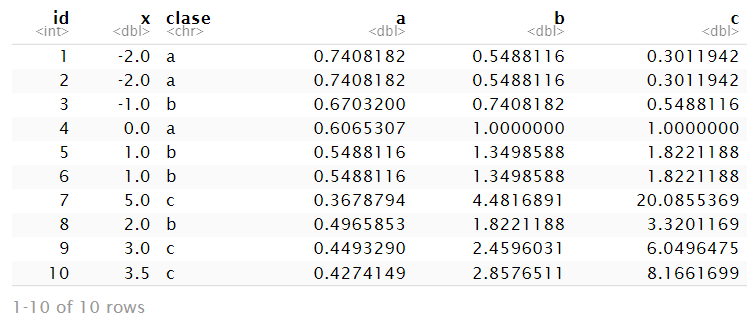

Y ahora normalizamos para que $a$, $b$ y $c$ sumen $1$:

```r
probas <- probas |>
  mutate(suma = a + b + c) |> 
  mutate(across(c("a", "b", "c"), ~ .x / suma))
```

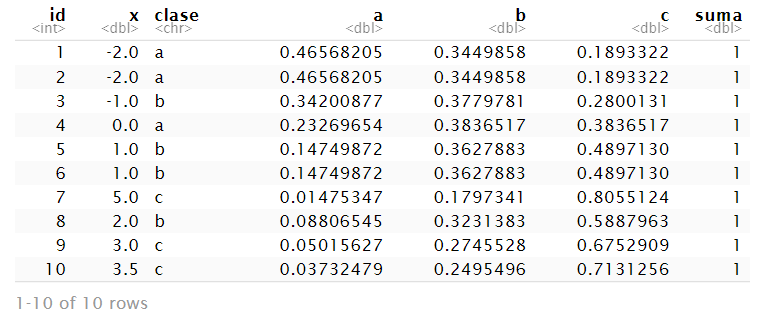

Y vemos que en cada renglón $a$, $b$, y $c$ suman $1$. Estas son las probabilidades
de nuestro modelo logístico multinomial. Podemos graficarlas:

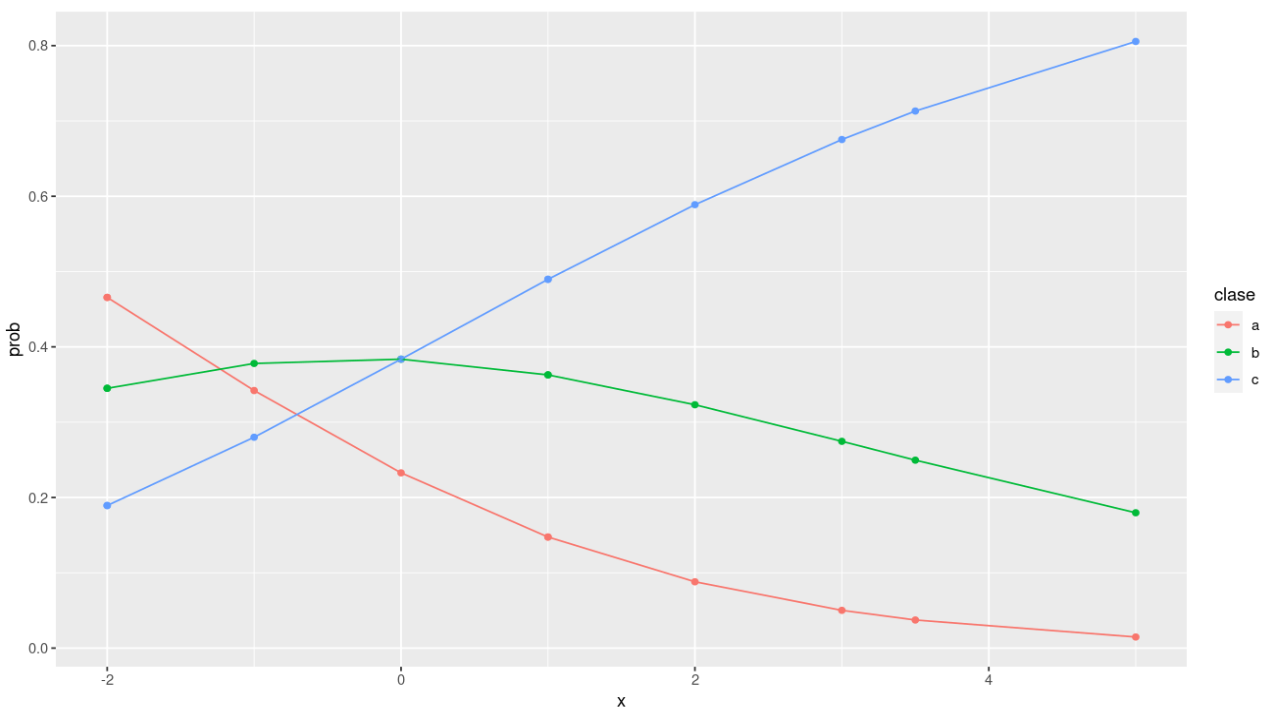

**Pregunta 6**:
<br>¿Las probabilidades de cada clase en un modelo logístico multinomial
tienen que ser siempre crecientes o decrecientes? Explica por qué no pasa esto, aún cuando 
las funciones $f_a, f_b, f_c$ son lineales.
>Lo que sucede es que las 3 clases interactúan entre sí para cumplir la condición de sumar $1$, es decir, si una clase se mueve necesariamente las otras dos clases van a compensar el cambio. La probabilidad de cada clase es creciente o decreciente dependiendo de la clase en sí misma. Esto se puede observar en la gráfica anterior de la siguiente manera:
>* La clase $a$ siempre es decreciente.
>* La clase $b$ tiene una región en la que es creciente, y después es decreciente.
>* La clase $c$ siempre es creciente.
>
>Adicionalmente, a pesar que las funciones de clase son lineales, en el modelo de clasificación tienen comportamiento no lineal debido a se les aplicó la transformación `softmax`


**Pregunta 7**:
<br>Escribe un modelo que de las mismas probabilidades, pero que
tenga $f_c(x) = 0$ para toda $x$ ¿Eso quiere decir que la probabilidad de $c$ no cambia para 
ninguna $x$

Se ejecutan los mismos pasos de arriba, pero con la siguiente variante:
<br>Funciones de clase:
<br>**Nótese** que a las clases $a$ y $b$ se les está restando $0.6x$ para compensar el ajuste en la clase $c$

```r
probas <- datos_tbl |> 
  tibble(a = -0.5 - 0.1 * x - 0.6 * x, b =  0.3 * x - 0.6*x, c = 0)
```
Obteniendo `softmax`:
```r
probas <- probas |>
  mutate(across(c("a", "b", "c"), ~ exp(.x)))
```
Normalizando:
```r
probas <- probas |>
  mutate(suma = a + b + c) |> 
  mutate(across(c("a", "b", "c"), ~ .x / suma))
```
Graficando:
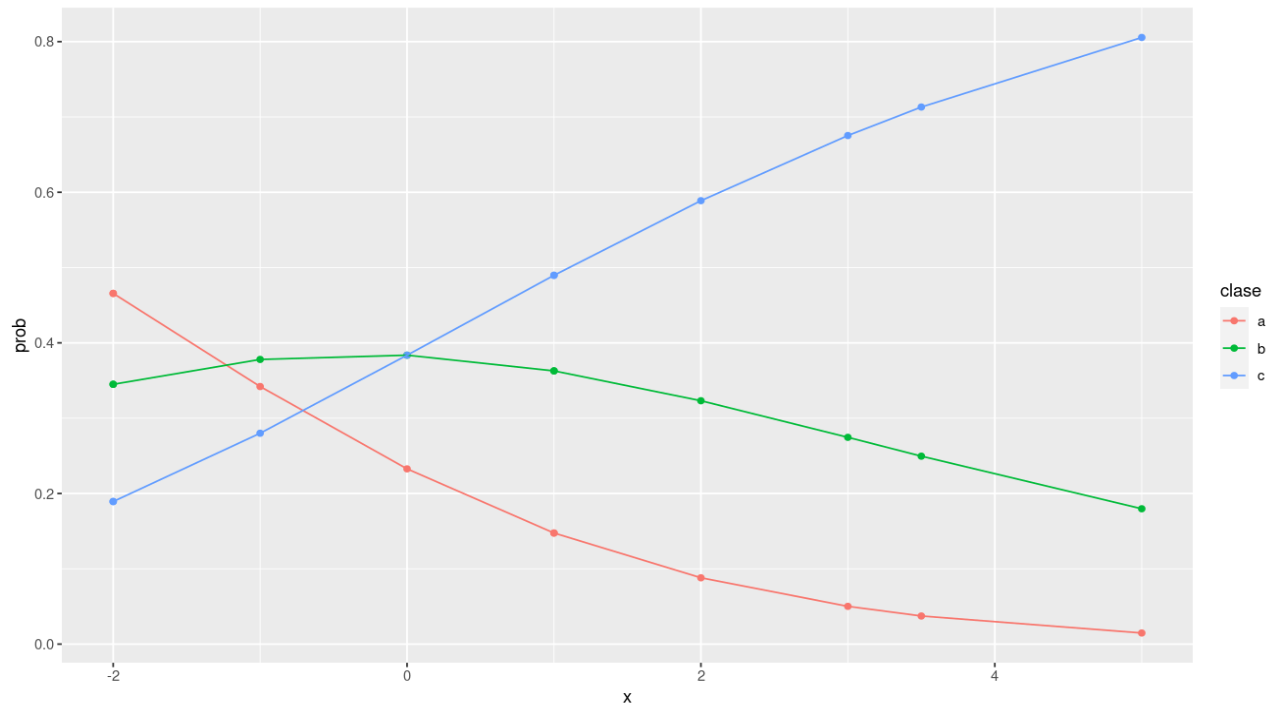

Y luego calcula con el código de arriba los probabilidades. Verifica que son iguales.

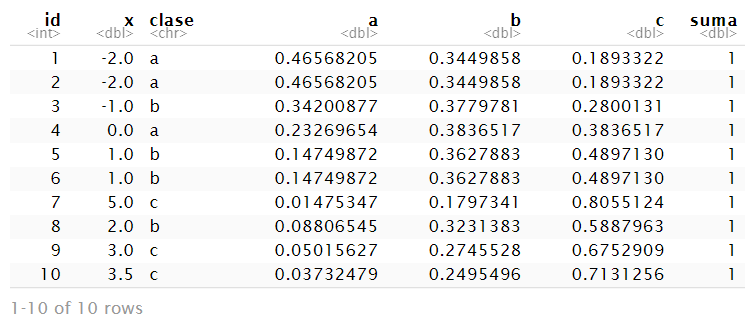

>Las probabilidades efectivamente son iguales que en el ejercicio anterior. Por otro lado, el que la función de la clase $c$ se haya definido como una constante, no quiere decir que las probabilidades de $p_c(x)$ no cambien con diferentes $x_i$ dadas.

**Pregunta 8**:
<br>Según esto, explica por qué en un modelo de regresión logística multinomial
podemos escoger una clase de referencia para la que hacemos su función $f$ correspodiente
igual a 0 (coeficientes igual a 0), y esto no implica ninguna restricción adicional.
Como casi siempre usamos regularización, generalmente no es necesario hacer este paso.
>Porque se está forzando a que las funciones de clase $f$ compensen a la clase de referencia. Y debido a que posteriormente se ajusta la salida para que sean probabilidades que sumen $1$ con la transformación `softmax`, entonces en las salidas resultan en lo mismo. Dicho de otra manera, no es necesario hacer explícita a la clase de referencia porque queda definida con las otras clases.

**Pregunta 9**:
<br>¿Qué pasa con estas probabildades si pones un valor de regularización
considerablemente más alto? ¿Por qué este modelo que considera tres predictores lineales
separados puede ser que no funcione bien sin regularización?

La siguiente gráfica se generó utilizando $\lambda=1x10^{-4}$:

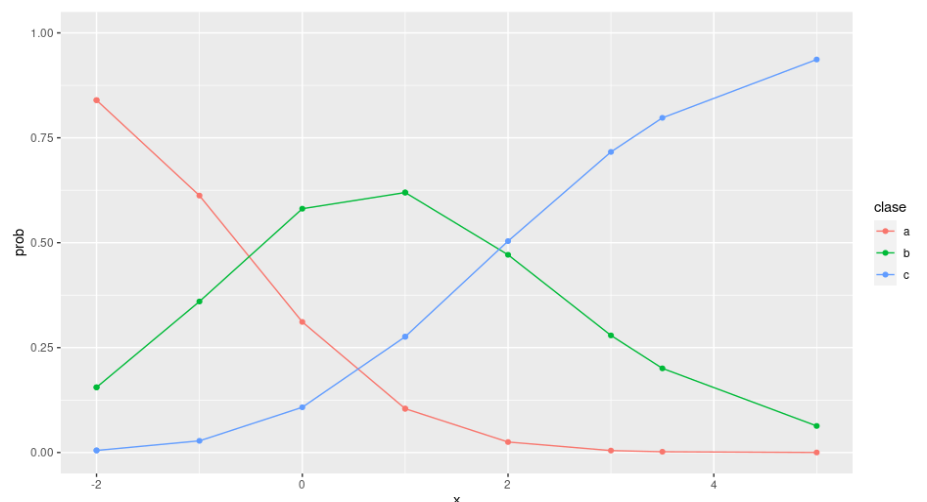

Incrementando $\lambda=1.5$ se tiene:

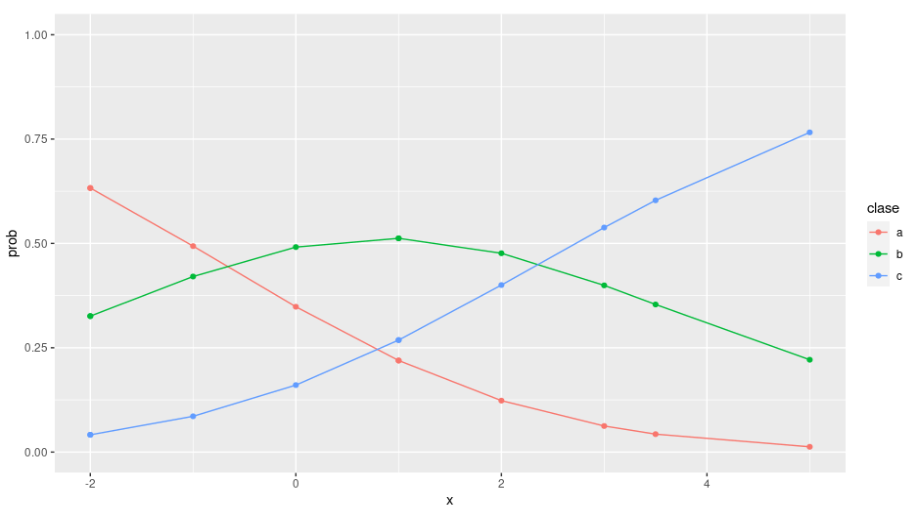

>Lo que está pasando es que con valores más grandes de $\lambda$ se están "aplastando" las curvas de las 3 clases, es decir, a mayor regularización será cada vez más difícil para el modelo determinar la clase que domina sobre las demás
><br>Este modelo puede no funcionar si no se utiliza regularización está sobre-parametrizado, es decir, se tienen más clases de las necesarias para describir el problema. Si no se regulariza, entonces el modelo correo el riesgo de no encontrar una solución única sino un conjunto de soluciones. Al regularizar, se elimina la sobre-parametrización del problema y por ende se puede llegar a una única solución.

---